In [ ]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [82]:
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True)

In [83]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [84]:
print (housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

Text(0, 0.5, 'Number of houses')

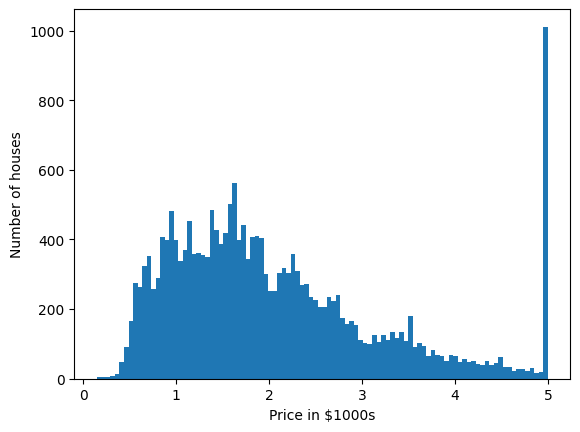

In [85]:
plt.hist(housing.target,bins=100)
plt.xlabel('Price in $1000s')
plt.ylabel('Number of houses')

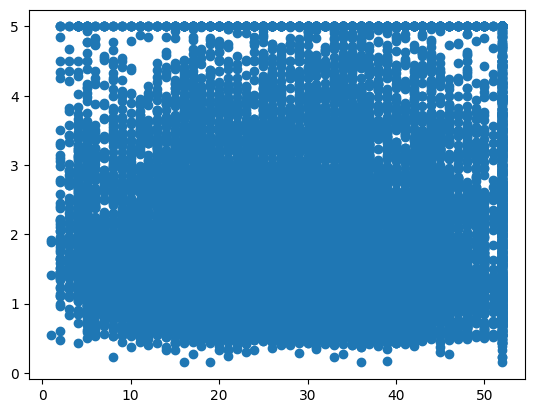

In [86]:
plt.scatter(housing.data[:,1],housing.target)

In [87]:
california_df = DataFrame(housing.data)

In [88]:
california_df.columns = housing.feature_names

In [89]:
california_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [90]:
california_df['Price']=housing.target

In [91]:
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


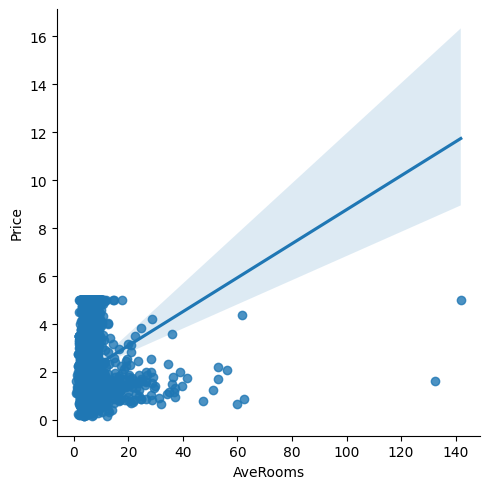

In [92]:
sns.lmplot(x='AveRooms',y='Price',data=california_df)

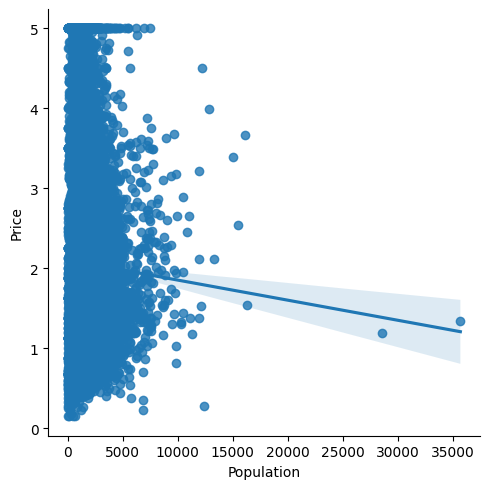

In [93]:
sns.lmplot(x='Population',y='Price',data=california_df)

In [94]:
X=california_df.AveRooms
X.shape

(20640,)

In [95]:
X=np.hstack(california_df.AveRooms)
X.shape

(20640,)

In [96]:
Y=california_df.Price

In [97]:
X=np.array( [ [value,1] for value in X] )

In [98]:
X

array([[6.98412698, 1.        ],
       [6.23813708, 1.        ],
       [8.28813559, 1.        ],
       ...,
       [5.20554273, 1.        ],
       [5.32951289, 1.        ],
       [5.25471698, 1.        ]])

In [99]:
m,b = np.linalg.lstsq(X,Y)[0]

C:\Users\abin.k\AppData\Local\Temp\ipykernel_5008\324140955.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m,b = np.linalg.lstsq(X,Y)[0]


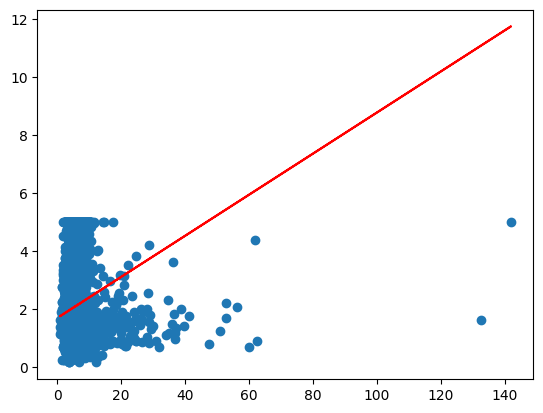

In [100]:
x=california_df.AveRooms
plt.plot(california_df.AveRooms,california_df.Price,'o')

plt.plot(x,m*x+b,'r',label='Best Fit Line')
plt.show()

In [101]:
result = np.linalg.lstsq(X,Y)
total_error = result[1]
rmse = np.sqrt(total_error/len(X))
print("The root mean squared error was %.2f " %rmse)

The root mean squared error was 1.14 


C:\Users\abin.k\AppData\Local\Temp\ipykernel_5008\1086471201.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  result = np.linalg.lstsq(X,Y)
C:\Users\abin.k\AppData\Local\Temp\ipykernel_5008\1086471201.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("The root mean squared error was %.2f " %rmse)


In [102]:
import sklearn
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
X_multi = california_df.drop('Price',axis=1)
Y_target = california_df.Price
lreg.fit(X_multi,Y_target)
#print("intercept is %.2f"%lreg.intercept_)
print(' The estimated intercept coefficient is %.2f ' %lreg.intercept_)
print ('No.of Coefficients is %.2f' %len(lreg.coef_))

 The estimated intercept coefficient is -36.94 
No.of Coefficients is 8.00


In [103]:
coeff_df = DataFrame(california_df.columns)
coeff_df.columns = ['Features']
coeff_df['Coefficient Estimate']=pd.Series(lreg.coef_)
#coeff_df

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,california_df.Price)
#print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

#lreg = LinearRegression
lreg.fit(X_train,Y_train)

pred_test = lreg.predict(X_test)
pred_train = lreg.predict(X_train)


LinearRegression()

In [108]:
print("Fit a model X_train, and calculate MSE with Y_train %.2f:" %np.mean((Y_train-pred_train)**2))
      
print("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f" %np.mean((Y_test - pred_test)**2))

Fit a model X_train, and calculate MSE with Y_train 1.30:
Fit a model X_train, and calculate MSE with X_test and Y_test: 1.29


Text(0.5, 1.0, 'Residual Plots')

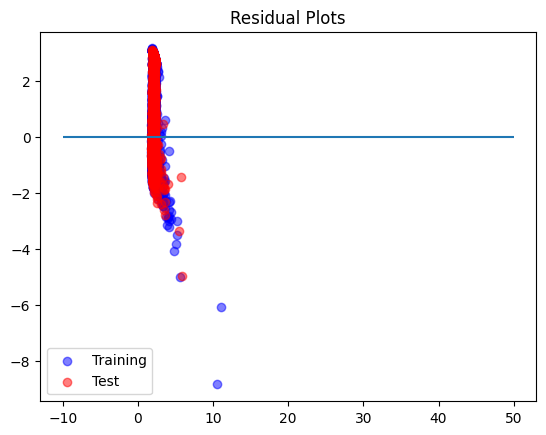

In [112]:
train = plt.scatter(pred_train,(Y_train-pred_train),c='b',alpha=0.5)
test = plt.scatter(pred_test,(Y_test-pred_test),c='r',alpha=0.5)
plt.hlines(y=0,xmin=-10,xmax=50)
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')